In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wall_time = []
Nsp= [1,10,50,100,500,1000,5000,10000,50000,100000,1000000]#
for N in Nsp:
    file_name = "weaver/HostTimes/wall_times"+str(N)+".dat"
    data = np.genfromtxt(file_name,
                     dtype={'names': ('computation type', 'total time', 'time per sample'), 'formats': ('S30', 'f16', 'f16')},
                     delimiter=",",
                     skip_header=1)
    wall_time += [data]

In [3]:
# print(wall_time)

In [4]:
source_term = []
analytic_jacobian = []
numerical_jacobian = []
numerical_jacobian_fwd = []
sacado_jacobian = []

for wt in wall_time:
    source_term += [wt[0][2]]
    analytic_jacobian += [wt[1][2]]
    numerical_jacobian += [wt[2][2]]
    numerical_jacobian_fwd += [wt[3][2]]
    sacado_jacobian += [wt[4][2]]

In [5]:
print(sacado_jacobian)

[0.008429177, 0.0012095522, 0.00025104622, 0.00013487132, 8.851875e-05, 7.3689709e-05, 6.46782336e-05, 6.48037935e-05, 6.488239582e-05, 6.453763056e-05, 6.3624217747e-05]


Text(0, 0.5, 'Number of samples')

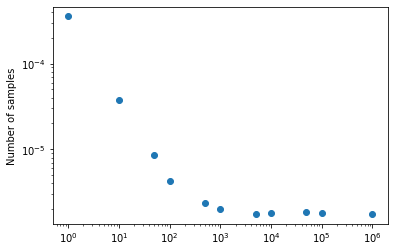

In [6]:
plt.figure()
plt.plot(Nsp,source_term,'o')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Time per sample [s]')
plt.ylabel('Number of samples')

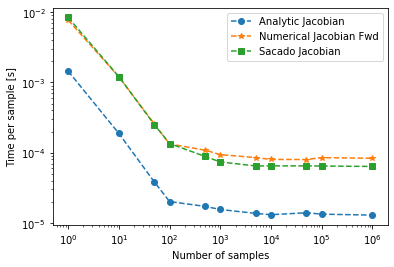

In [7]:
plt.figure()
plt.plot(Nsp, analytic_jacobian, 'o--', label=(wall_time[0][1][0]).decode("utf-8"))
# plt.plot(Nsp, numerical_jacobian, '*--', label=(wall_time[0][2][0]).decode("utf-8"))
plt.plot(Nsp, numerical_jacobian_fwd, '*--', label=(wall_time[0][3][0]).decode("utf-8"))
plt.plot(Nsp, sacado_jacobian, 's--', label=(wall_time[0][4][0]).decode("utf-8"))
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Time per sample [s]')
plt.xlabel('Number of samples')
plt.legend(loc='best')